# Bayes' Theorem

This notebook contains the building blocks of Bayes Theorem based classifiers.

In [1]:
# This function calculates Bayes' Theorem

def bayes_rule(p_b_a, p_a, p_b):
    return((p_b_a*p_a)/p_b)

In [4]:
bayes_rule(.73, .2, .226)

0.6460176991150441

# Breaking down P(B)

From Learn.Co "Bayes' Theorem - Lab"

Exercise 3 - Bayesian Disease Diagnosis
Visit this link for an insight into Bayesian Disease Daignosis

A disease test is advertised as being 99% accurate

If a patient has the disease,they will test positive 99% of the time.

If you don't have the disease, they will test negative 99% of the time.

1% of all people have this disease

Now a patient tests positive, what is the probability that you actually have the disease?

In [9]:
p_test_positive_given_disease = 0.99
p_test_negative_given_no_disease = 0.99
p_have_disease = 0.01
p_positive_test = (p_have_disease*p_test_positive_given_disease)+((1-p_have_disease)*(1-p_test_negative_given_no_disease))

#p_a_b = probability that you actually have the disease given positive test

bayes_rule(p_test_positive_given_disease, p_have_disease, p_positive_test)

0.4999999999999997

In [10]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
plt.style.use('ggplot')
figsize(15, 15)

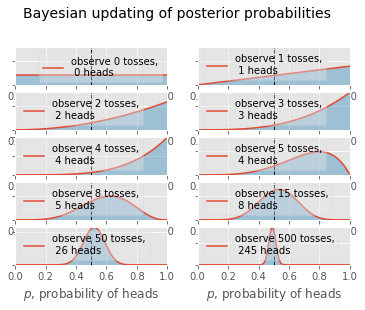

In [12]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)


for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads")
    plt.setp(sx.get_yticklabels(), visible=False)
    
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.show()